In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Personalización Avanzada

En esta práctica no guiada veremos algunos aspectos de personalización que les podrían resultar muy útiles. Iré explicando en el cuadernos y en los comentarios en el código cada paso que hagamos. 

Esta práctica es opcional ya que en la grán mayoría de los casos son técnicas que no les serán necesarias en su día a dia. 

Estas personalizaciones avanzadas son las siguientes:
- Utilizando fuentes de texto personalizadas
- Construyendo subplots de diferente tamaño
- Utilizando colores personalizados en vez de paletas predefinidas
- Utilizando un Eje Quebrado
- Mover los ticks al eje opuesto
- Construyendo subplots con cuadrículas no-uniformes

# Utilizando Fuentes Personalizadas

In [2]:
import matplotlib.font_manager as font_manager
import matplotlib

# Esta sentencia va a cargar todas las fuentes que tenemos instaladas en nuestra computadora
# Asegurence de cambiar el PATH por el suyo. Este path será similar para usuarios de MacOS.
# En Windows lo más probable es que sea: 'C:\Windows\Fonts', pero podría cambiar.
for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)
    
# Esto va a mostrar por pantalla todas las fuentes disponibles
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/System/Library/Fonts/Supplemental/Shree714.ttc',
 '/System/Library/Fonts/Supplemental/Courier New Italic.ttf',
 '/System/Library/Fonts/Supplemental/Kailasa.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansOldNorthArabian-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansOlChiki-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansOsmanya-Regular.ttf',
 '/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf',
 '/System/Library/Fonts/Supplemental/Courier New Bold.ttf',
 '/System/Library/Fonts/Supplemental/STIXSizTwoSymReg.otf',
 '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc',
 '/Users/leonardokuffo/Library/Fonts/Roboto-BoldCondensedItalic.ttf',
 '/System/Library/Fonts/Supplemental/STIXIntUpSmBol.otf',
 '/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf',
 '/System/Library/Fonts/LastResort.otf',
 '/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf',
 '/System/Library/Fonts/Suppleme

In [3]:
# Configuramos la fuente de manera global para todos los gráficos con un tamaño por defecto
matplotlib.rc('font', family='Droid Serif', size=5) 

# Los gráficos que hagamos a partir de aquí, utilizarán esta fuente

### Leemos los datos de tienda_ventas. Crearemos un dataframe para hacer un grafico de lineas de las ventas por mes de dos familias de productos (una linea por cada familia) y otro dataframe para hacer un pie chart con el porcentaje de ventas que representa cada familia de producto.

In [4]:
df = pd.read_csv('../data/tienda_ventas.csv')
df = df[df['family'].isin(['SEAFOOD', 'MEATS'])]
df['mes'] = df['date'].apply(lambda x: x[:7])

# Dataframe para el grafico de lineas
df = df.groupby(['mes', 'family']).agg({
    'sales': 'sum'
}).reset_index()

# Dataframe para el pie chart
df_pie = df.groupby('family').agg({'sales': 'sum'})
df_pie

,sales
family,
MEATS,2.179821e+07
SEAFOOD,1.441224e+06


In [5]:
df

,mes,family,sales
0,2013-01,MEATS,533154.783758
1,2013-01,SEAFOOD,34953.833998
2,2013-02,MEATS,480354.959696
3,2013-02,SEAFOOD,33287.885986
4,2013-03,MEATS,525533.343087
...,...,...,...
75,2016-02,SEAFOOD,37064.826952
76,2016-03,MEATS,543454.350060
77,2016-03,SEAFOOD,39254.808992
78,2016-04,MEATS,583662.446813


# Utilizando colores personalizados

In [6]:
# Si utilizamos Seaborn, podemos definir colores con un diccionario y las categorias que queremos que tenga cada color
colors = {
    'MEATS': '#4b8bf5',
    'SEAFOOD': '#f6b26b'
}

# Cuando utilicemos Pandas o Matplotlib tendremos que crear un ListedColorMap apartir de una lista de colores
# Aqui estamos cogiendo los valores de nuestro diccionario de colores como una lista ['#4b8bf5', '#f6b26b']
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors.values())

# Este ColorMap lo podemos utilizar para cualquier grafico que hagamos en Pandas o Matplotlib

In [7]:
font = {'size': 8}
matplotlib.rc('font', **font) # Esta es otra forma de configurar globalmente el tamaño de la fuente

# Creando subplots de tamaños diferentes

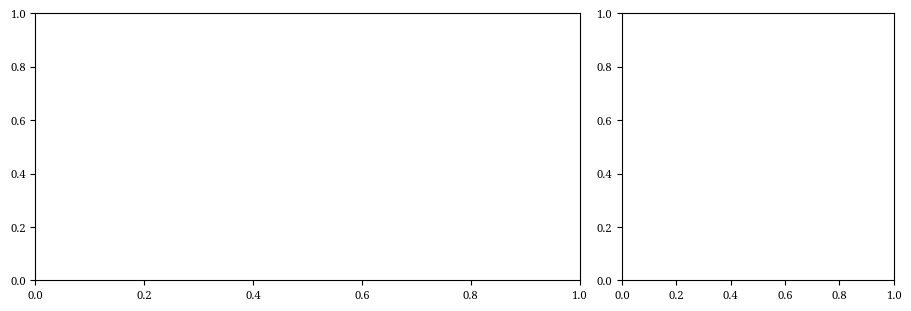

In [8]:
# Podemos crear subplots que no tengan el mismo tamano
fig, (ax1, ax2) = plt.subplots(
    1, 2, 
    constrained_layout=True, 
    gridspec_kw={ 
        # Esto lo hacemos definiendo la relacion entre los tamanos. 
        # En este caso el primer subplot sera 2 veces el tamano del segundo (2:1)
        'width_ratios': [2, 1]
    }
)
fig.set_size_inches(9, 3)

### Recordemos lo que haremos: Un grafico de lineas de las ventas por mes de dos familias de productos (una linea por cada familia) y un pie chart con el porcentaje de ventas que representa cada familia de producto

/var/folders/5q/75t4z1sd6vg5lq56p9vh1cgm0000gn/T/ipykernel_42432/324763943.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(


Text(0, 0.5, '')

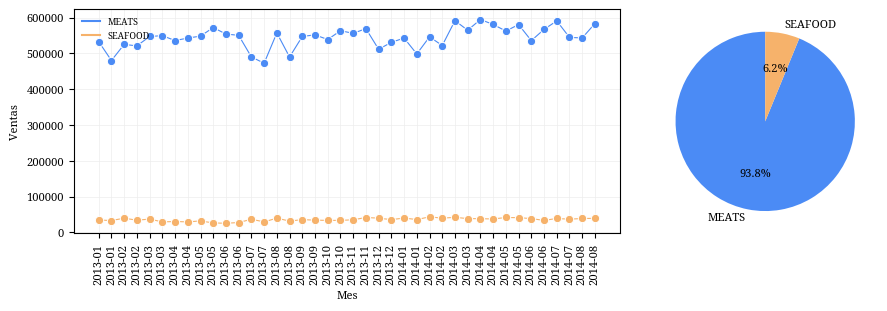

In [9]:
# Volvemos a repetir la creacion de los subplots en esta nueva celda
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, gridspec_kw={ 'width_ratios': [2, 1] })
fig.set_size_inches(9, 3)

# Grafico de Lineas
# Para los colores del grafico de lineas en Seaborn utilizamos el diccionario de colores que creamos
sns.lineplot(
    data=df, 
    x="mes", 
    y="sales", 
    hue='family',
    ax=ax1,
    linewidth=0.8,
    marker="o",
    palette=colors # Aqui
)

# Pie Chart
# Para los colores del PieChart en Pandas utilicamos el ColorMap que creamos
df_pie.plot.pie( 
    y='sales', 
    startangle=90,
    autopct='%1.1f%%',
    ax=ax2,
    legend=False,
    colormap=cmap # Aqui
)

# Configuramos un poco el grid
ax1.xaxis.grid(linewidth=0.5, color='#ededed')
ax1.yaxis.grid(linewidth=0.5, color='#ededed')
ax1.set_axisbelow(True)

# Posicionamos la leyenda
ax1.legend(
    loc="upper left",
    prop={'size': 6.5}, # Otra foram de definir el tamano de la fuente en la leyenda
    frameon=False, # Podemos quitarle el marco a la leyenda
    bbox_to_anchor=(0,1)
)

# Colocamos las etiquetas
ax1.set_ylabel('Ventas')
ax1.set_xlabel('Mes')
# Rotamos los ticks del eje X
ax1.set_xticklabels(
    df['mes'], 
    rotation=90 # Rotacion de las etiquetas
)

# Quitamos el Y label del PieChart
ax2.set_ylabel('')

# Problema
Tenemos el típico problema de los rangos disparejos que no nos permite analizar los cambios de tendencia en una de las líneas. En clases vimos que una solución era hacer subplots. Sin embargo, hay otra solución que es muy interesante: Utilizar **ejes quebrados**.

(Esto es una técnica muy avanzada de graficación)

# Ejes Quebrados

La idea es utilizar dos subplots pero que estos compartan los mismos Ejes Y y X. Y que exista entre ambos subplots una separación "quebrada", que indique que entre esos dos gráficos hay un rango de valores en el Eje que fueron omitidos.

En este caso, queremos quebrar el Eje Y.

Este será el resultado final:
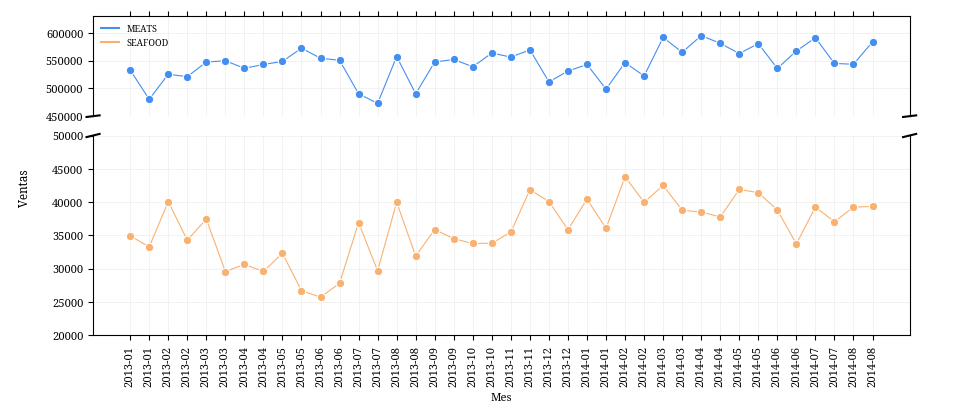


/var/folders/5q/75t4z1sd6vg5lq56p9vh1cgm0000gn/T/ipykernel_42432/3450868618.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1d.set_xticklabels(


Text(0.02, 0.6, 'Ventas')

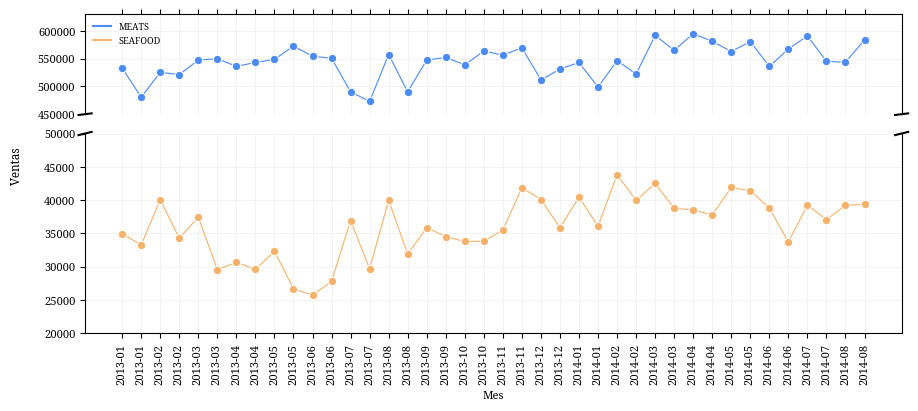

In [10]:
# Primero definimos los subplots. 
# 2 filas, 1 columns
# También, definimos que el subplot superior tenga una relación de tamaño 1:2 con el inferior
fig, (ax1u, ax1d) = plt.subplots(2, 1, constrained_layout=True, gridspec_kw={'height_ratios': [1,2]})
fig.set_size_inches(9, 4)

# ax1u: Subplot quebrado UP - SUPERIOR (meats)
# ax1d: Subplot quebrado DOWN - INFERIOR (seafood)

# En ambos ax1u y ax1d graficamos el mismo lineplot
sns.lineplot(
    data=df, 
    x="mes", 
    y="sales", 
    hue='family',
    ax=ax1u,
    linewidth=0.8,
    marker="o",
    palette=colors # Aqui
)
sns.lineplot(
    data=df, 
    x="mes", 
    y="sales", 
    hue='family',
    ax=ax1d,
    linewidth=0.8,
    marker="o",
    palette=colors # Aqui
)

# Aqui el truco mas importante de los ejes quebrados
# Definimos los rangos del eje Y en donde sabemos que van a estar cada una de nuestras lineas
# Para definir estos rangos solamente debemos de ver el primer grafico hecho en la seccion anterior
ax1u.set_ylim(450000, 630000) # Rango de meats
ax1d.set_ylim(20000, 50000) # Rango de seafood

# Hacemos que los ticks se coloquen solo arriba en el grafico superior
ax1u.xaxis.tick_top()
ax1u.spines['bottom'].set_visible(False)
ax1u.tick_params(labeltop=False)

# Y solo abajo en el grafico inferior
ax1d.spines['top'].set_visible(False)
ax1d.xaxis.tick_bottom()

# ======= MAGIA ========
# Estas siguientes lineas son matemáticas para que matplotlib coloque esas lineas diagonales para
# darle la apariencia a los ejes de que estan quebrados. No es necesario entender lo que hacen estas lineas
# Esta variable "d" determina que tan largas son esas lineas. Pueden jugar con este parámetro para que vean la diferencia
d = .008
kwargs = dict(transform=ax1u.transAxes, color='k', clip_on=False)
ax1u.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1u.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax1d.transAxes)  # switch to the bottom axes
ax1d.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1d.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
# === FIN DE LA MAGIA ===

# Ocultamos las etiquetas del grafico superior
ax1u.set_xlabel('')
ax1u.set_ylabel('')
# Le ponemos un grid
ax1u.xaxis.grid(linewidth=0.5, color='#ededed')
ax1u.yaxis.grid(linewidth=0.5, color='#ededed')
ax1u.set_axisbelow(True)
# Grid  del grafico inferior
ax1d.xaxis.grid(linewidth=0.5, color='#ededed')
ax1d.yaxis.grid(linewidth=0.5, color='#ededed')
ax1d.set_axisbelow(True)
# Ponemos la etiqueta en X en el grafico inferior
ax1d.set_xlabel('Mes')
ax1d.set_ylabel('')

# Solo en el grafico inferior ponemos ticks
ax1d.set_xticklabels(
    df['mes'], 
    rotation=90
)

# Configuramos la leyenda del grafico superior
ax1u.legend(
    loc="upper left",
    prop={'size': 6.5},
    frameon=False,
    bbox_to_anchor=(0,1)
)
# Removemos la leyenda del inferior
ax1d.legend().remove()

# Ponemos una etiqueta Y global para ambos subplots 
fig.supylabel(
    'Ventas', 
    verticalalignment='center', 
    horizontalalignment='center', 
    y=0.6, # La ajustamos un poco debido a que el espacio entre los ejes quebrados la mueve ligeramente. Esta Y es un porcentaje, parecido a bbox_to_anchor
    fontsize=8.5
)

# Problema
Ahora para introducir el PieChart tenemos un problema: Nuestra cuadrícula solo podría ser de 2x2. Por lo que no podríamos introducir el PieChart sin dejar in espacio en blanco. Es aquí donde introducimos otra personalización avanzada: Subplots No-Uniformes

La idea es combinar las celdas de la cuadrícula de los subplots. Esta también es una técnica muy avanzada de personalización.

Ref: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_and_subplots.html

Este será nuestro resultado final:
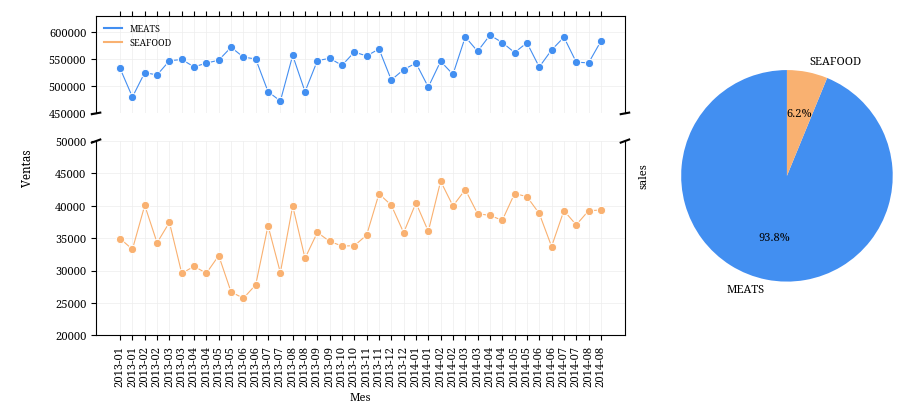

# Subplots No Uniformes

GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[2, 1])

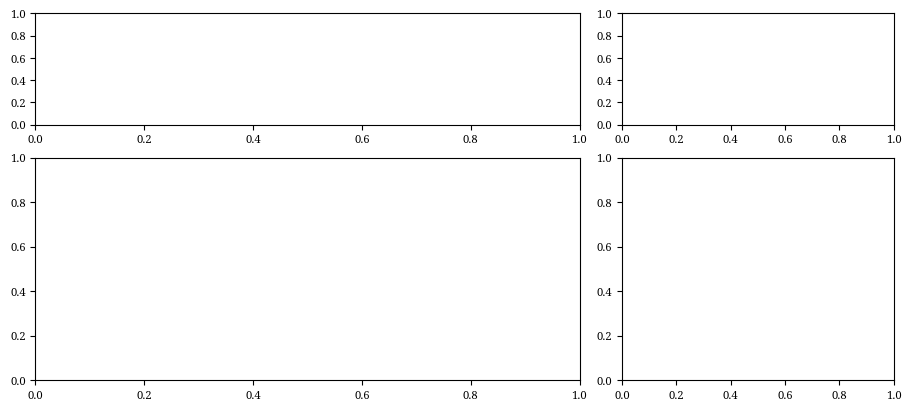

In [11]:
fig, (
    (ax1u, pie1),
    (ax1d, pie2)
) = plt.subplots(
    2, 2, # Nuestro grid inicial es de 2x2 (2 filas, 2 columnas)
    constrained_layout=True, 
    gridspec_kw={ # Combinamos los parametros que antes utilizamos por separado 
        'height_ratios': [1,2], 
        'width_ratios': [2,1]
    })
fig.set_size_inches(9, 4)

# Ahora viene lo interesante
# Obtenemos un objeto que nos provee matplotlib llamado GridSpec
# El GridSpec es un objeto que representa la cuadricula.
gs = ax1u.get_gridspec()
gs

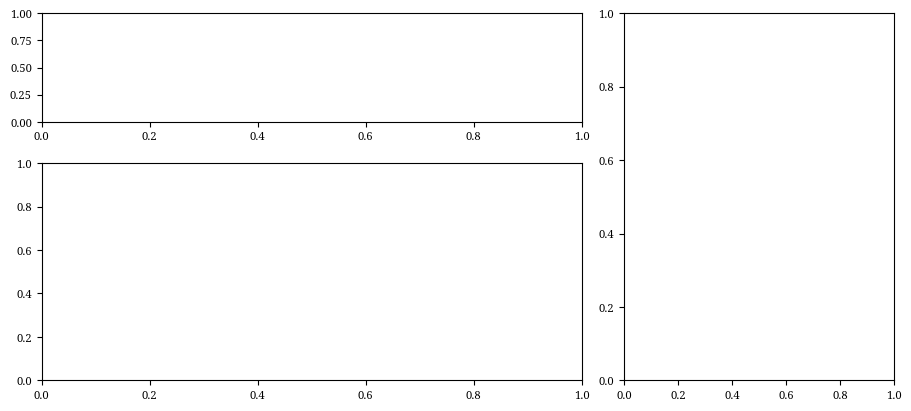

In [12]:
# Luego que tenemos guardado el GridSpec procedemos a remover todas las celdas
# que queremos que se combinen. En este caso es pie1 y pie2
pie1.remove()
pie2.remove()

# Y ahora, A LA FIGURA, le añadimos UN SOLO SUBPLOT, que ocupe todo el espacio
# de las celdas que quiero combinar. En este caso son todas las filas, de la segunda columna (indice 1)
axpie = fig.add_subplot(gs[:, 1])
fig

/var/folders/5q/75t4z1sd6vg5lq56p9vh1cgm0000gn/T/ipykernel_42432/2802647647.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1d.set_xticklabels(df['mes'], rotation=90)


Text(647.5807962962963, 0.5, '')

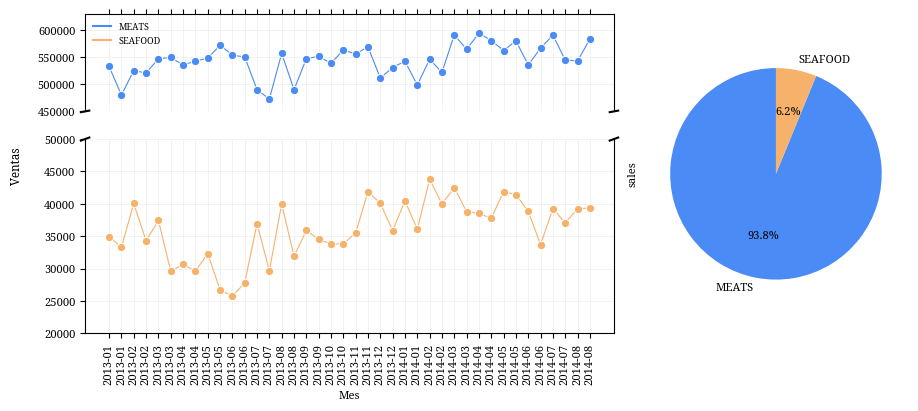

In [13]:
# Ahora tenemos ax1u, ax1d, y axpie
# Repetimos todos los pasos

fig, ((ax1u, pie1),(ax1d, pie2)) = plt.subplots(2, 2, constrained_layout=True, gridspec_kw={ 'height_ratios': [1,2], 'width_ratios': [2,1]})
fig.set_size_inches(9, 4)
gs = ax1u.get_gridspec()
pie1.remove()
pie2.remove()
axpie = fig.add_subplot(gs[:, 1])

# ======= Repetimos construccion de LinePlot con eje quebrado =======
sns.lineplot(
    data=df, 
    x="mes", 
    y="sales", 
    hue='family',
    ax=ax1u,
    linewidth=0.8,
    marker="o",
    palette=colors
)
sns.lineplot(
    data=df, 
    x="mes", 
    y="sales", 
    hue='family',
    ax=ax1d,
    linewidth=0.8,
    marker="o",
    palette=colors
)

# Ejes quebrados
ax1u.set_ylim(450000, 630000) # Rango de meats
ax1d.set_ylim(20000, 50000) # Rango de seafood
ax1u.xaxis.tick_top()
ax1u.spines['bottom'].set_visible(False)
ax1u.tick_params(labeltop=False)
ax1d.spines['top'].set_visible(False)
ax1d.xaxis.tick_bottom()

# ======= MAGIA ========
d = .008
kwargs = dict(transform=ax1u.transAxes, color='k', clip_on=False)
ax1u.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1u.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax1d.transAxes)  # switch to the bottom axes
ax1d.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1d.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
# === FIN DE LA MAGIA ===

ax1u.set_xlabel('')
ax1u.set_ylabel('')
ax1u.xaxis.grid(linewidth=0.5, color='#ededed')
ax1u.yaxis.grid(linewidth=0.5, color='#ededed')
ax1u.set_axisbelow(True)
ax1d.xaxis.grid(linewidth=0.5, color='#ededed')
ax1d.yaxis.grid(linewidth=0.5, color='#ededed')
ax1d.set_axisbelow(True)
ax1d.set_xlabel('Mes')
ax1d.set_ylabel('')
ax1d.set_xticklabels(df['mes'], rotation=90)
ax1u.legend(
    loc="upper left",
    prop={'size': 6.5},
    frameon=False,
    bbox_to_anchor=(0,1)
)
ax1d.legend().remove()
fig.supylabel(
    'Ventas', 
    verticalalignment='center', 
    horizontalalignment='center', 
    y=0.6, # La ajustamos un poco debido a que el espacio entre los ejes quebrados la mueve ligeramente. Esta Y es un porcentaje, parecido a bbox_to_anchor
    fontsize=8.5
)
# ======= Fin de construccion de LinePlot con eje quebrado =======


# ======= Repetimos construccion de PieChart =======
df_pie.plot.pie( 
    y='sales', 
    startangle=90,
    autopct='%1.1f%%',
    ax=axpie,
    legend=False,
    colormap=cmap # Aqui
)
ax2.set_ylabel('')


# Otro Ejemplo de Subplots No Uniformes

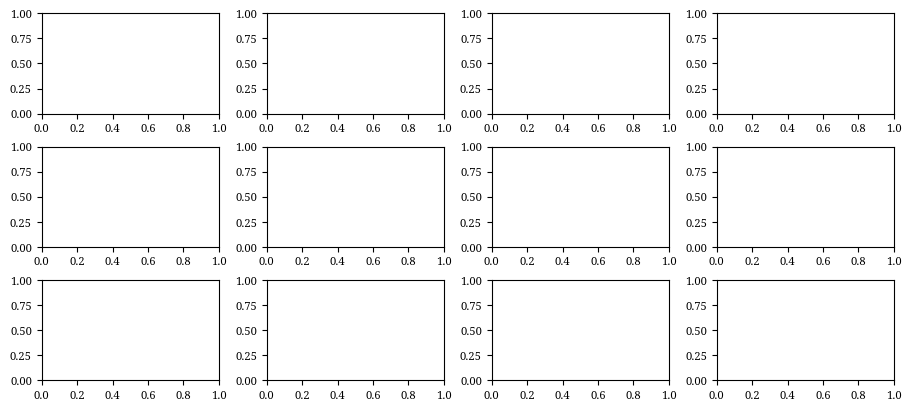

In [14]:
fig, (
    (a1, b1, c1, d1),
    (a2, b2, c2, d2),
    (a3, b3, c3, d3)
) = plt.subplots(3, 4, constrained_layout=True)
fig.set_size_inches(9, 4)

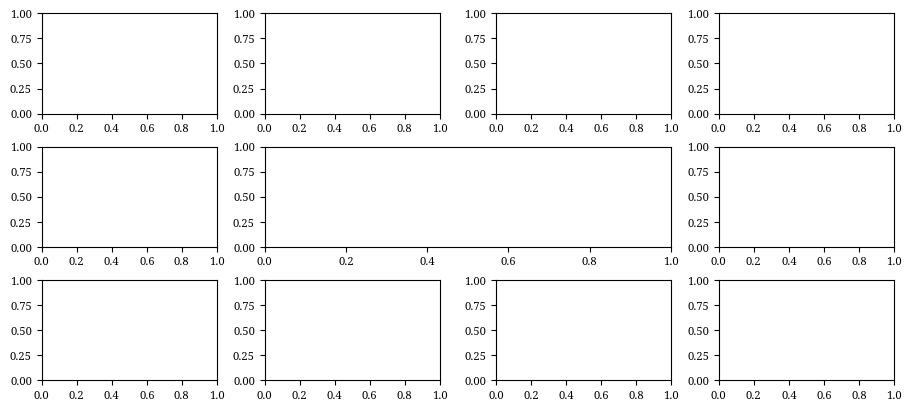

In [15]:
gs = a1.get_gridspec()
b2.remove()
c2.remove()
ax_combinada = fig.add_subplot(gs[1, 1:3]) # RANGO DE CELDAS QUIERO COMBINAR
fig

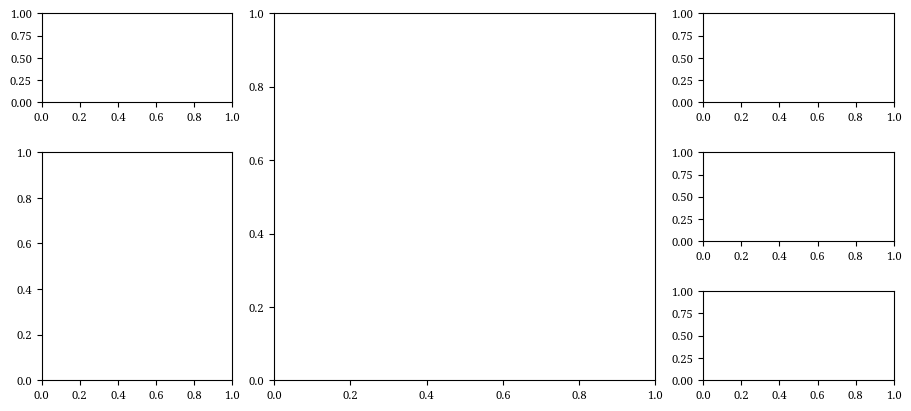

In [16]:
fig, (
    (a1, b1, c1, d1),
    (a2, b2, c2, d2),
    (a3, b3, c3, d3)
) = plt.subplots(3, 4, constrained_layout=True)
fig.set_size_inches(9, 4)
gs = a1.get_gridspec()

a2.remove()
a3.remove()

b1.remove()
c1.remove()
b2.remove()
c2.remove()
b3.remove()
c3.remove()


ax_primera_columna = fig.add_subplot(
    gs[1:3, 0]  # RANGO DE CELDAS QUIERO COMBINAR
)
ax_centro = fig.add_subplot(
    gs[0:3, 1:3] # RANGO DE CELDAS QUIERO COMBINAR
) 